In [45]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [96]:
def bitree(n):
    h = np.power(2., -n);
    nl = 1;
    for i in range(n):
        nl *= 2
    tree =  0.5*h + h*np.linspace(0, nl, nl, endpoint=False)
    return tree

In [194]:
def fx(x):
    return np.exp(-32*(0.5-x)**2)

In [195]:
def restriction(fxl):
    #restricts or averages from l to l-1
    _fx = []
    for i in range(len(fxl)):
        if (i%2 == 1):
            val = 0.5*(fxl[i-1] + fxl[i]); 
            _fx.append(val);
    return _fx;

#Apply ghost
nghost = 2;
def boundary(x, fx):
    #symmetric boundary for fx at x=0, x=1
    xb = []
    fxb =[]
    l = len(x)
    for i_ in range(nghost):
        i = nghost-i_-1;
        xb.append(-x[i])
        fxb.append(fx[i])
    for i in range(l):
        xb.append(x[i])
        fxb.append(fx[i])
    for i_ in range(nghost):
        i = (l-nghost)-i_+1
        xb.append(2. - x[i])
        fxb.append(fx[i])
    return xb,fxb

def prolongation(xl_1, fxl_1):
    #interpolates from l-1 to l
    _x, _fx = boundary(xl_1, fxl_1);
    fxl = []
    for _i in range(len(fxl_1)):
        i = _i + nghost
        val = 0.25* _fx[i-1] + 0.75* _fx[i]
        fxl.append(val)
        val = 0.75* _fx[i] + 0.25* _fx[i+1]
        fxl.append(val)
    return fxl;

In [196]:
x4 = bitree(4)
x3 = bitree(3)
x10 = bitree(10) # ~1000 points for reference only
fx10 = fx(x10)

In [197]:
fx4 = fx(l4)
fx4

array([8.83826307e-04, 5.08606923e-03, 2.27941809e-02, 7.95595087e-02,
       2.16265167e-01, 4.57833362e-01, 7.54839602e-01, 9.69233234e-01,
       9.69233234e-01, 7.54839602e-01, 4.57833362e-01, 2.16265167e-01,
       7.95595087e-02, 2.27941809e-02, 5.08606923e-03, 8.83826307e-04])

In [198]:
#restricted to coarser level
fx3 = restriction(fx4)
fx3

[0.0029849477689738754,
 0.05117684480092002,
 0.3370492643007508,
 0.8620364182326757,
 0.8620364182326757,
 0.3370492643007508,
 0.05117684480092002,
 0.0029849477689738754]

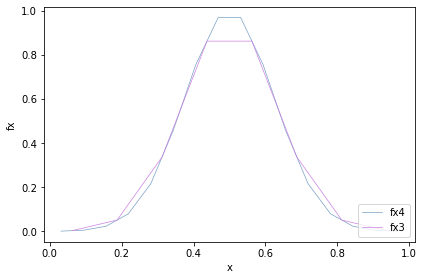

In [199]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("fx")
ax1.plot(x4, fx4, linewidth = 0.7, label = "fx4")
ax1.plot(x3, fx3, linewidth = 0.7, label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

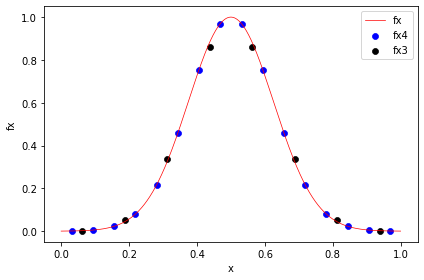

In [200]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("fx")
ax1.plot(x10, fx10, linewidth = 0.7, label = "fx", color = 'r')
#ax1.plot(x4, fx4, linewidth = 0.7, label = "fx4")
ax1.scatter(x4, fx4, linewidth = 0.7, label = "fx4", color = 'b')
#ax1.plot(x3, fx3, linewidth = 0.7, label = "fx3")
ax1.scatter(x3, fx3, linewidth = 0.7, label = "fx3", color = "black")

x3b, fx3b = boundary(x3, fx3)
#ax1.plot(x3b, fx3b, linewidth = 0.7,  label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [201]:
Ifx4 = prolongation(x3, fx3)
Ifx4

[0.0029849477689738754,
 0.01503292202696041,
 0.03912887054293348,
 0.1226449496758777,
 0.2655811594257931,
 0.468296052783732,
 0.7307896297496945,
 0.8620364182326757,
 0.8620364182326757,
 0.7307896297496945,
 0.468296052783732,
 0.2655811594257931,
 0.1226449496758777,
 0.03912887054293348,
 0.01503292202696041,
 0.0029849477689738754]

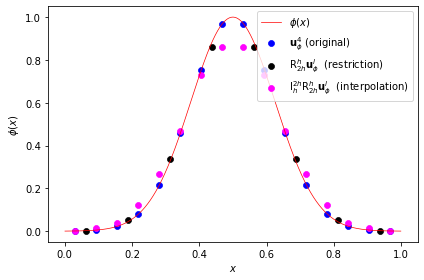

In [202]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$\phi(x)$")

pl0 = ax1.plot(x10, fx10, linewidth = 0.7, label = r"$\phi(x)$", color = 'r')
pl1 = ax1.scatter(x4, fx4, linewidth = 0.7, label = r"$\mathbf{u}_\phi^{4}$ (original)", color = 'b')
#ax1.plot(x3, fx3, linewidth = 0.7, label = "fx3")
pl2 = ax1.scatter(x3, fx3, linewidth = 0.7, label = r"$\mathrm{R}_{2h}^{h} \mathbf{u}_\phi^l $  (restriction)", color = 'black')
pl3 = ax1.scatter(x4, Ifx4, linewidth = 0.7, label = r"$ \mathrm{I}_{h}^{2h} \mathrm{R}_{2h}^{h} \mathbf{u}_\phi^l $  (interpolation)", color = "magenta")

x3b, fx3b = boundary(x3, fx3)
#ax1.plot(x3b, fx3b, linewidth = 0.7,  label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

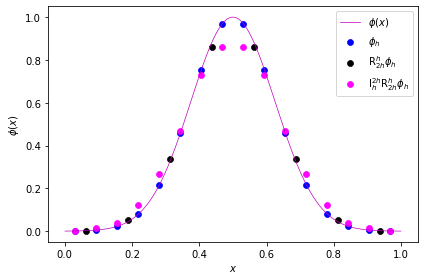

In [203]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$\phi(x)$")

pl0 = ax1.plot(x10, fx10, linewidth = 0.7, label = r"$\phi(x)$", color = 'm')
pl1 = ax1.scatter(x4, fx4, linewidth = 0.7, label = r"$\phi_h$", color = 'b')
#ax1.plot(x3, fx3, linewidth = 0.7, label = "fx3")
pl2 = ax1.scatter(x3, fx3, linewidth = 0.7, label = r"$\mathrm{R}_{2h}^{h} \phi_h $ ", color = 'black')
pl3 = ax1.scatter(x4, Ifx4, linewidth = 0.7, label = r"$ \mathrm{I}_{h}^{2h} \mathrm{R}_{2h}^{h} \phi_h $", color = "magenta")

x3b, fx3b = boundary(x3, fx3)
#ax1.plot(x3b, fx3b, linewidth = 0.7,  label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("bitree-adpt.png")

plt.show()

In [ ]:
params = {
    'axes.labelsize': 8,
    'font.size': 8,
    'mathtext.fontset' : 'cm',
    'font.family' : 'TexGyreSchola',
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'xtick.major.size' : 2.,
    'ytick.major.size' : 2.,
    'xtick.minor.size' : 1.,
    'ytick.minor.size' : 1.,
    'text.usetex': True,
    'figure.figsize': [2.75,1.85],
    'axes.linewidth' : 0.75,
    'figure.subplot.left' : 0.2,
    'figure.subplot.bottom' : 0.18,
    'figure.subplot.right' : 0.85,
    'figure.subplot.top' : 0.97,
    'savefig.dpi' : 300,
}
mpl.rcParams.update(params)

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$\phi(x)$")

pl0 = ax1.plot(x10, fx10, linewidth = 0.3, label = r"$\phi(x)$", color = 'r', zorder = 1)
ax1.errorbar(x4, 0.5*(Ifx4+fx4), xerr=x4-x4, yerr=0.5*(Ifx4 - fx4), linestyle = 'none', color = 'g', zorder = 2);#, lolims=1, uplims=0, label = r"$e(\phi_h(x))$")
pl1 = ax1.plot(x4, fx4, marker = 'o', markersize = 8, linestyle = 'none', label = r"$\phi_h$", color = 'r', zorder = 3)
pl3 = ax1.scatter(x4, Ifx4, linewidth = 0.7, label = r"$ \mathrm{I}_{h}^{2h} \mathrm{R}_{2h}^{h} \phi_h $", color = "black", zorder = 4)
#pl1 = ax1.scatter(x4, fx4, linewidth = 0.7, label = r"$\phi_h$", color = 'b')
#ax1.plot(x3, fx3, linewidth = 0.7, label = "fx3")
pl2 = ax1.scatter(x3, fx3, linewidth = 0.7, label = r"$\mathrm{R}_{2h}^{h} \phi_h $ ", color = 'b', zorder = 5)


#             lolims=lolims, uplims=uplims,

x3b, fx3b = boundary(x3, fx3)
#ax1.plot(x3b, fx3b, linewidth = 0.7,  label = "fx3")

#ax1.plot(x3, fx4, linewidth = 0.7, label = "fx")

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("bitree-adpt.png")
plt.savefig("bitree-adpt.eps")


plt.show()

findfont: Font family ['TexGyreSchola'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:

fig, ax1 = plt.subplots()

cols = ["#7aa0c4", "#ca82e1", "#8bcd50", "#df9f53", "#64b9a1",
        "#745ea6", "#db7e76"]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", cols)


ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$e_h(\phi_h )$")
pl3 = ax1.scatter(x4, abs(Ifx4-fx4), linewidth = 0.7, label =  r"$e_h(\phi_h )$", c = 'b');#label = 
                  #r"${e}_h (\phi_h (x_h))= |\phi_h  - \mathrm{I}_{h}^{2h} \mathrm{R}_{2h}^{h}\phi_h (x_h)$", c = 'red');#color = "#7aa0c4")

plt.axhline(y = .06, color = 'r', linestyle = 'dashed', label = r'$\epsilon_\phi$') 
plt.axhline(y = .04, color = 'g', linestyle = 'dashed', label = r'$2/3 \epsilon_\phi$') 
ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("bitree-adpt-error.png")
plt.savefig("bitree-adpt-error.eps")


plt.show()

In [ ]:

# fig, ax1 = plt.subplots()

# cols = ["#7aa0c4", "#ca82e1", "#8bcd50", "#df9f53", "#64b9a1",
#         "#745ea6", "#db7e76"]

# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", cols)


# ax1.set_xlabel(r"$x$")
# ax1.set_ylabel(r"$e_h(\phi_h )$")
# pl3 = ax1.scatter(x4, abs(Ifx4-fx4), linewidth = 0.7, label =  r"$e_h(\phi_h )$", c = 'b');#label = 
#                   #r"${e}_h (\phi_h (x_h))= |\phi_h  - \mathrm{I}_{h}^{2h} \mathrm{R}_{2h}^{h}\phi_h (x_h)$", c = 'red');#color = "#7aa0c4")

# plt.axhline(y = .06, color = 'r', linestyle = 'dashed', label = r'$\epsilon_\phi$') 
# plt.axhline(y = .04, color = 'g', linestyle = 'dashed', label = r'$2/3 \epsilon_\phi$') 
# ax1.legend(loc = "upper right")

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# #plt.savefig("bitree-adpt-error.png", dpi = 600)

# plt.show()

# #ax1.imshow(fig, aspect='normal')
# fig.savefig('bitree-adpt-error.png', dpi=600)

In [ ]:
def export_figure_matplotlib(arr, f_name, dpi=200, resize_fact=1, plt_show=False):
    """
    Export array as figure in original resolution
    :param arr: array of image to save in original resolution
    :param f_name: name of file where to save figure
    :param resize_fact: resize facter wrt shape of arr, in (0, np.infty)
    :param dpi: dpi of your screen
    :param plt_show: show plot or not
    """
    fig = plt.figure(frameon=False)
    fig.set_size_inches(arr.shape[1]/dpi, arr.shape[0]/dpi)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(arr)
    plt.savefig(f_name, dpi=(dpi * resize_fact))
    if plt_show:
        plt.show()
    else:
        plt.close()